<a href="https://colab.research.google.com/github/arsh09/Kalman-and-Bayesian-Filters-in-Python/blob/master/autoencoder_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1tPx2GxyDixXqCDdC-sjQF9PXt7bkoFAP)

## **Introduction**

In this workshop, we are going to train a very basic autoencoder. An autoencoder is an unsupervised machine learning technique where you train the model on input data without any labels/ground-truth (thats why its under unsupervised branch) in the hopes that the trained model will capture the important co-relations between the inputted data dimensions. 

The goal of training such a network is to find the nonlinear relation among multiple dimensions of input dataset. Some of the applications of the autoencoders are dimentionality reduction, data compression, anomaly detection and many more. 

An autoencoders contains three parts/layers: 

1) An encoding layer called as 'Encoder'. 

2) A decoding layer called as 'Decoder'.

3) A bottleneck-layer where your input data is transformed/reduced/compressed into a simpler representation. 


![Autoencoder](https://sci2lab.github.io/ml_tutorial/images/autoen_architecture.png)

### **Similar Techniques:**
Similar to autoencoders, there are other dimentionality reduction algorithms/techniques such as [Principle Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis#:~:text=Principal%20component%20analysis%20(PCA)%20is,components%20and%20ignoring%20the%20rest.). Major differences between PCA and autoencoders are that autoencoders able to capture the nonlinearity of the input data as opposed to PCA which works well with linear relationship mostly.

### **Why Autoencoders:**

One of the reason to use autoencoders is to capture the latent space representation of a trained autoencoders and then use this representation for further training of different models such as a Convolutional Nueral Network (CNN) or a Fully Connected Network (FCN). 

The motivation is that if we train the CNN or FCN directly on our original datasets (normally in the form of images), these data images may contain noise and other useless information are we are not interested in training for in CNN and FCN. In contrast, using the latent space representation of our original image datasets to train a CNN or FCN may result in accuracy as well as it will train our CNN or FCN models faster. 

Of course there are many other reasons people use autoencoders. 


### **Training Code:** 

In this workshop, We will use ```keras``` library to train an autoencoder model on the MNIST datasets. 
### **Task:**
Your task will be to train a similar network on the breast phantom RGB images. The dataset for the RGB images are available [here](https://drive.google.com/drive/folders/1sSwIe5eejJDgYfWnbR3Qry-3qiGrWDWF). You can download the ```rtp-rgbd``` dataset and only use color images from this dataset for the autoencoder training. 
. 

In [1]:
# these two lines allow access from colab file to your google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# os is a small module use to set env. variables and other things
import os 
import time
# NumPy is an amazing numerical calculation library in Python.
import numpy as np
import matplotlib.pyplot as plt
# TensorFlow is GPU/CPU-based ML library from Google (opensource, so nice of them) 
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam 

In [3]:
# Lets seed the psuedo-random-number-generator in NumPy and TensorFlow.
# If you are interested to know why we need to seed the psuedo-random-number-generator, 
# first you should ask why it is called 'psuedo-random-number-generator' and not 
# 'raodom-number-generator'. Long story short, COMPUTERS ARE DUMB! 
# Ref: https://www.youtube.com/watch?v=SxP30euw3-0
np.random.seed(int(time.time()))
tf.random.set_seed(time.time() * 1000)

In [4]:
# Load the MNIST dataset
dataset = tf.keras.datasets.mnist
(X_train, Y_train) , (X_test, Y_test) = dataset.load_data()

# Note that we don't use Y_train and Y_test (which are labels 
# or ground truth) in autoencoder. 

# Lets see what the dataset looks like 
# N is the number of images, 
# W, H is the with and height of each image
print (f"Shape of the train dataset images in (N, W, H) is {X_train.shape}")
print (f"Shape of the test dataset images in (N, W, H) is {X_test.shape}")

# Lets take a look at a single WxH image. 
print (f"Shape of a single image in (W, H) is {X_train[0].shape}")
print (f"Type of a single pixel in one image is {X_train[0].dtype}")

# -------------------
#    PREPROCESSING 
# -------------------
# Normalize the data from 0 - 255 to 0 - 1.
X_train = X_train/255
X_test = X_test/255

# Save image height, width and channel 
# into some variables (used later).
imgW, imgH = X_train[0].shape
imgC = 1

X_train = np.reshape(X_train, (-1, imgH * imgW * imgC ))
X_test = np.reshape( X_test, (-1, imgH * imgW * imgC ) )
print (f"Train dataset images after flattening in (N, D) is {X_train.shape} where D = H * W * C")
print (f"Test dataset images after flattening in (N, D) is {X_test.shape} where D = H * W * C")

11501568/11490434 [==============================] - 0s 0us/step
Shape of the train dataset images in (N, W, H) is (60000, 28, 28)
Shape of the test dataset images in (N, W, H) is (10000, 28, 28)
Shape of a single image in (W, H) is (28, 28)
Type of a single pixel in one image is uint8
Train dataset images after flattening in (N, D) is (60000, 784) where D = H * W * C
Test dataset images after flattening in (N, D) is (10000, 784) where D = H * W * C


In [5]:
# Build an autoencoder model structure. 
LATENT_SPACE_DIM = 64
layer_input = Input( shape = (imgH * imgW * imgC ), name = "input_layer")
layer_bottleneck = Dense( LATENT_SPACE_DIM, activation = "relu" , name = "bottleneck_layer")(layer_input) 
layer_output = Dense( imgH*imgW*imgC, activation = "sigmoid" , name = "output_layer")(layer_bottleneck)
model_autoencoder = Model( layer_input, layer_output, name = "autoencoder_mnist_workshop" )
model_autoencoder.summary()

Model: "autoencoder_mnist_workshop"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 bottleneck_layer (Dense)    (None, 64)                50240     
                                                                 
 output_layer (Dense)        (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Fit the model on the data 
# Note that we use Adam optimzer to 
# change the weights of the network. Adam 
# is a fancier version of the gradient descent. 
# Ref: https://arxiv.org/abs/1412.6980

LEARNING_RATE = 1e-3
NUM_EPOCHS = 5
BATCH_SIZE = 256
model_autoencoder.compile(optimizer = Adam(LEARNING_RATE), loss = "binary_crossentropy")
model_autoencoder.fit( X_train, X_train, epochs = NUM_EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_test, X_test) , shuffle=True)

Epoch 1/5
235/235 [==============================] - 4s 15ms/step - loss: 0.2454 - val_loss: 0.1626
Epoch 2/5
235/235 [==============================] - 3s 13ms/step - loss: 0.1445 - val_loss: 0.1280
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.1191 - val_loss: 0.1092
Epoch 4/5
235/235 [==============================] - 3s 13ms/step - loss: 0.1041 - val_loss: 0.0974
Epoch 5/5
235/235 [==============================] - 3s 13ms/step - loss: 0.0945 - val_loss: 0.0898


In [7]:
# Save your train model (for later use). 
MODEL_SAVED_PATH = "/content/drive/MyDrive/Colab-Notebooks/AdvanceRoboticsWorkshop/autoencoders/model/rtp-rgbd/model_on_mnist/"

# make sure that the directory exists. 
# if not, then create one.
if not os.path.exists(MODEL_SAVED_PATH):
  os.mkdir(MODEL_SAVED_PATH)

# save the model
tf.keras.models.save_model( model_autoencoder, MODEL_SAVED_PATH , overwrite = True )

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab-Notebooks/AdvanceRoboticsWorkshop/autoencoders/model/rtp-rgbd/model_on_mnist/assets


In [8]:
# Load the model from drive 
loaded_autoencoder_model = tf.keras.models.load_model(MODEL_SAVED_PATH)
loaded_autoencoder_model.summary()

Model: "autoencoder_mnist_workshop"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 bottleneck_layer (Dense)    (None, 64)                50240     
                                                                 
 output_layer (Dense)        (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Do the predictions using the loaded autoencoder model. 
# Please note that the test input should be in the format 
# of (N, M) where N is number of test images and M is 
# each image HxWxC and normalized between 0 - 1.
predicted_images = loaded_autoencoder_model.predict( X_test )

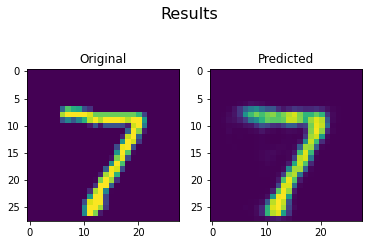

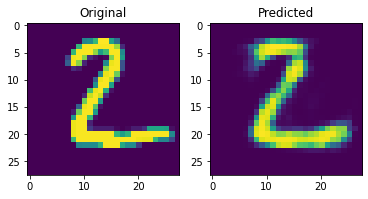

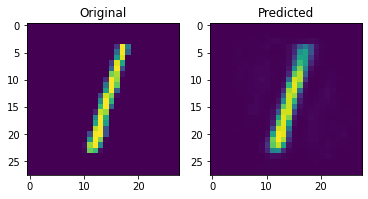

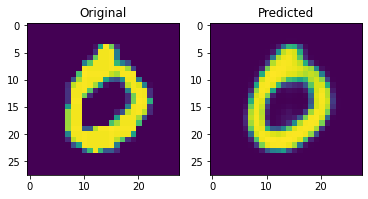

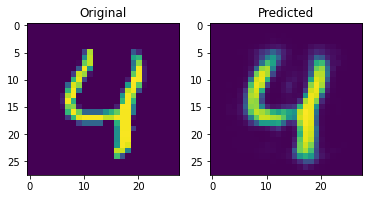

In [10]:
# Fix the normalization (from 0 - 1 to 0 - 255).
# Fix the shape from (N, M) -> (N, H, W, C)
predicted_images = np.reshape( predicted_images * 255, (-1, imgH, imgW ) )
predicted_images = predicted_images.astype(np.uint8)

text_X_ = np.reshape( X_test * 255, (-1, imgH, imgW ) )
text_X_ = text_X_.astype(np.uint8)


fig = plt.figure()
fig.suptitle("Results" , fontsize=16)

for i in range(5):
  ax = plt.subplot("121")
  ax.set_title("Original")
  plt.imshow( text_X_[i] )

  ax = plt.subplot("122")
  ax.set_title("Predicted")
  plt.imshow( predicted_images[i] )
  plt.show()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 784)]             0         
                                                                 
 bottleneck_layer (Dense)    (None, 64)                50240     
                                                                 
Total params: 50,240
Trainable params: 50,240
Non-trainable params: 0
_________________________________________________________________


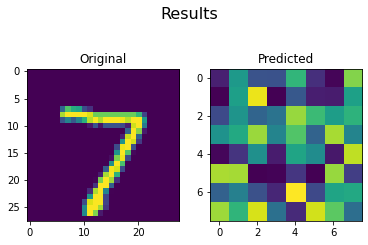

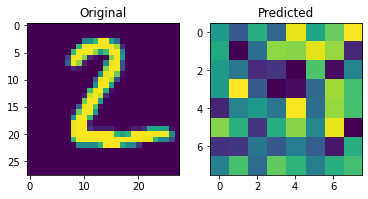

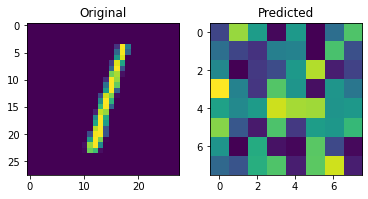

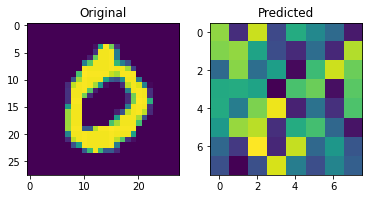

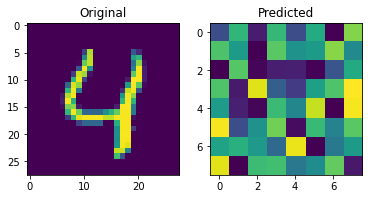

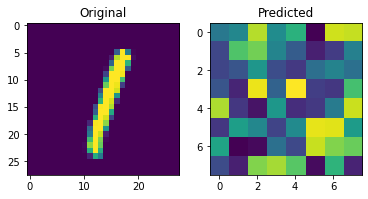

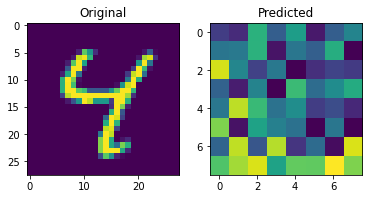

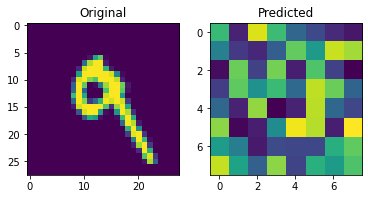

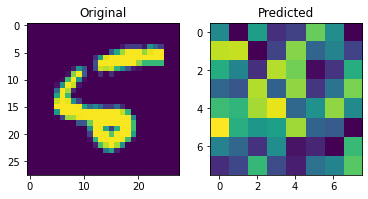

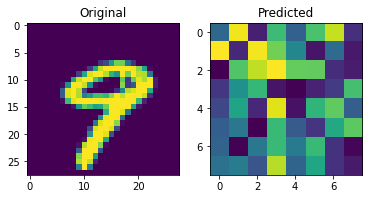

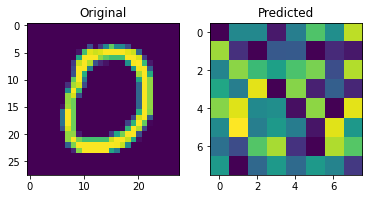

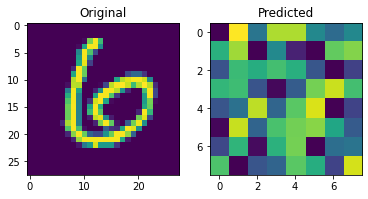

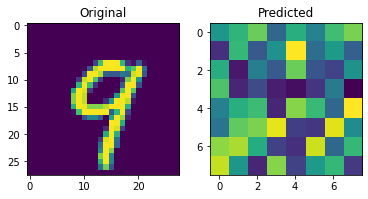

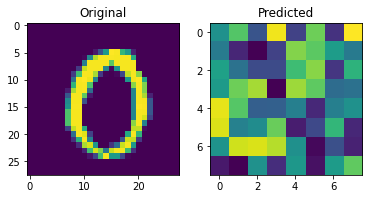

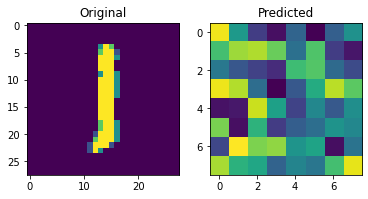

In [11]:
# We access the bottleneck layer output.  
input_to_bottleneck_model = tf.keras.Model(loaded_autoencoder_model.get_layer("input_layer").input, loaded_autoencoder_model.get_layer("bottleneck_layer").output)
input_to_bottleneck_model.summary()

# This means we can give the trained model any 
# input image and look at the bottle neck layer output. 
encoded_images = input_to_bottleneck_model.predict(X_test)

# Fix the normalization (from 0 - 1 to 0 - 255).
# Fix the size i.e. bottleneck layer has 64 dimension 
# we resize it encoded images to 8x8 
encoded_images = np.reshape( encoded_images * 255, (-1, 8, 8 ) )
encoded_images = encoded_images.astype(np.uint8)

text_X_ = np.reshape( X_test * 255, (-1, imgH, imgW ) )
text_X_ = text_X_.astype(np.uint8)


fig = plt.figure()
fig.suptitle("Results" , fontsize=16)

for i in range(15):
  ax = plt.subplot("121")
  ax.set_title("Original")
  plt.imshow( text_X_[i] )

  ax = plt.subplot("122")
  ax.set_title("Predicted")
  plt.imshow( encoded_images[i] )
  plt.show()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 output_layer (Dense)        (None, 784)               50960     
                                                                 
Total params: 50,960
Trainable params: 50,960
Non-trainable params: 0
_________________________________________________________________


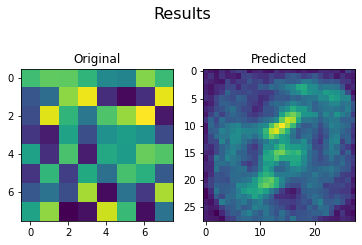

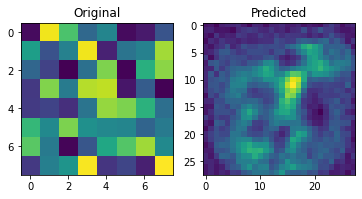

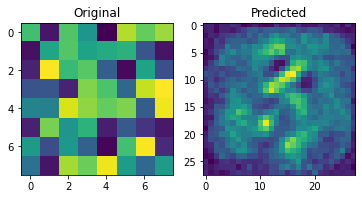

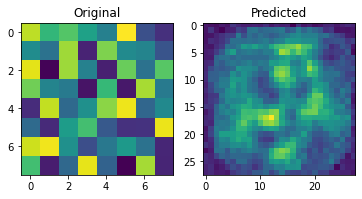

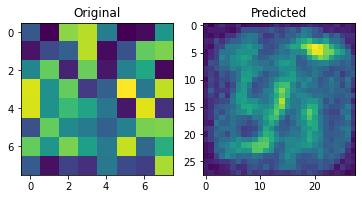

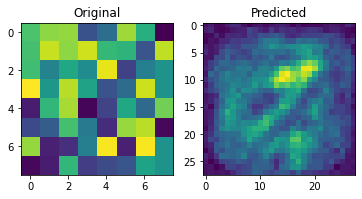

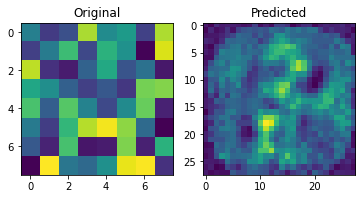

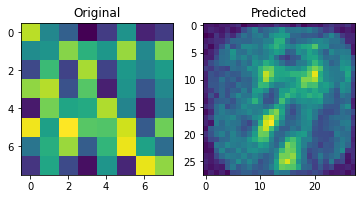

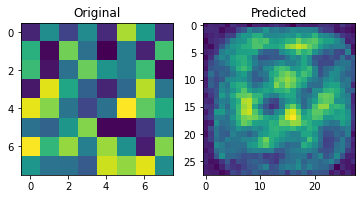

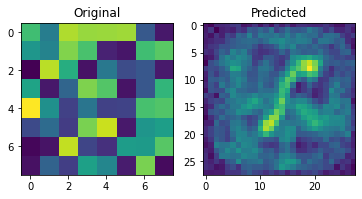

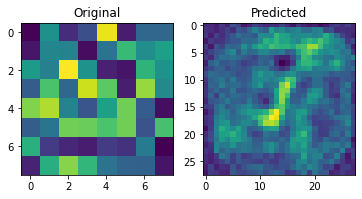

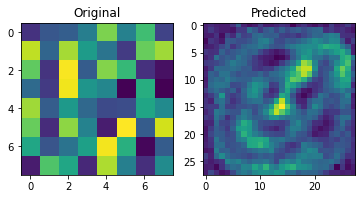

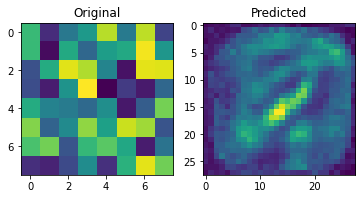

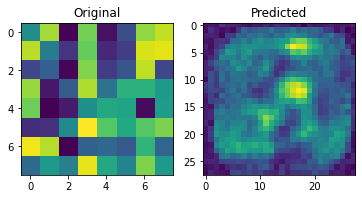

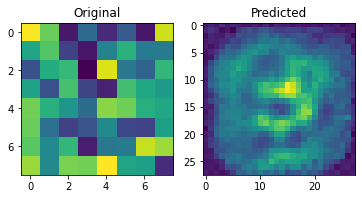

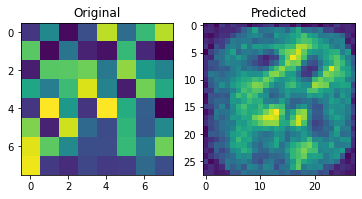

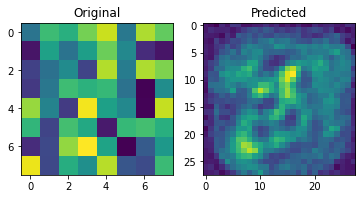

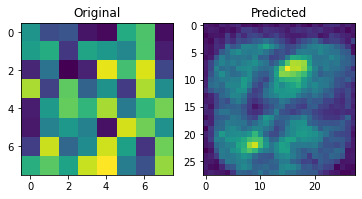

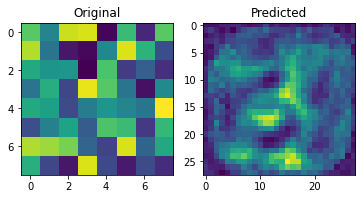

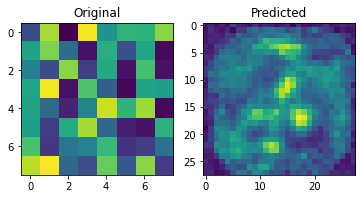

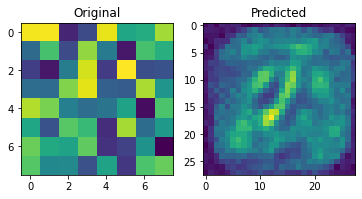

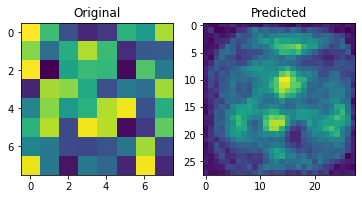

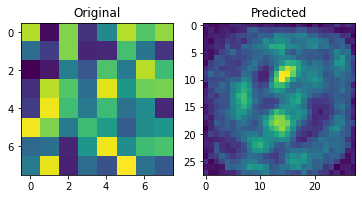

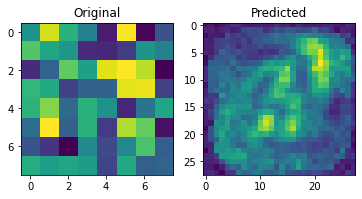

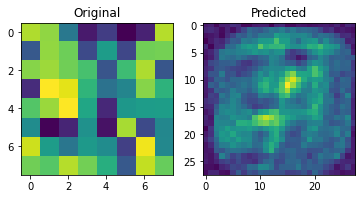

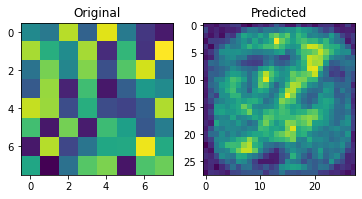

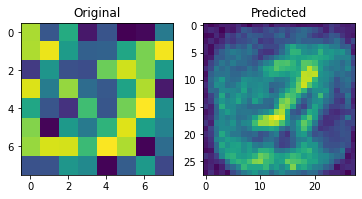

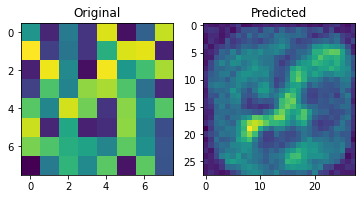

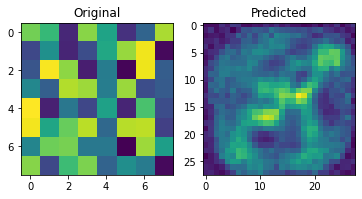

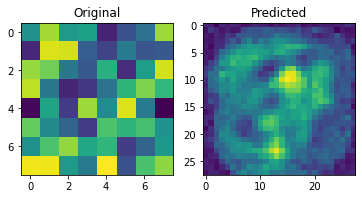

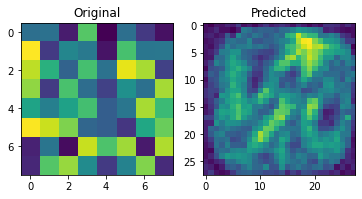

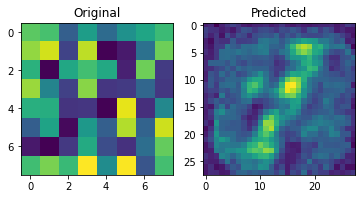

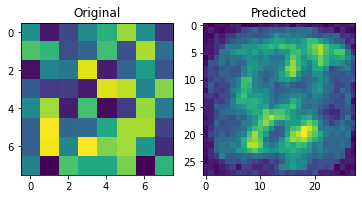

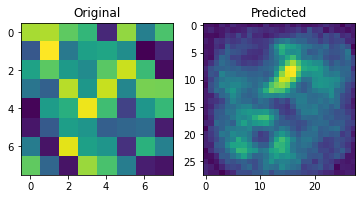

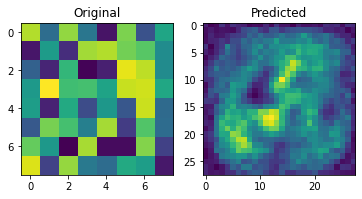

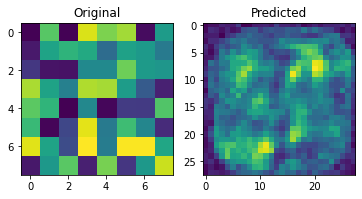

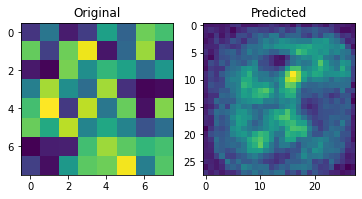

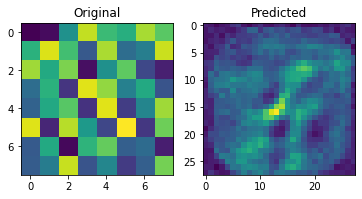

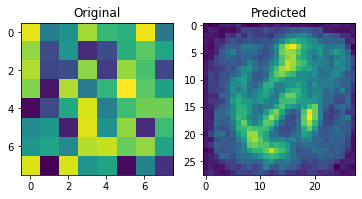

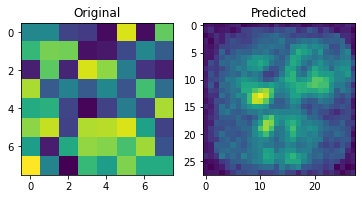

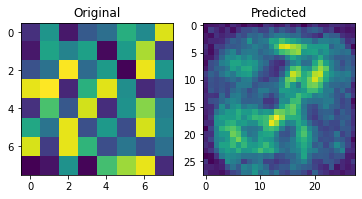

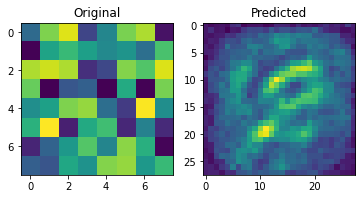

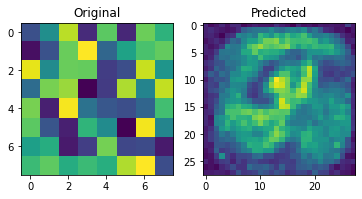

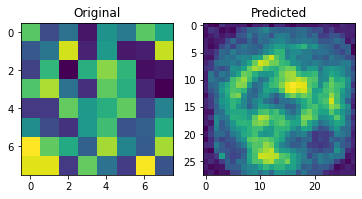

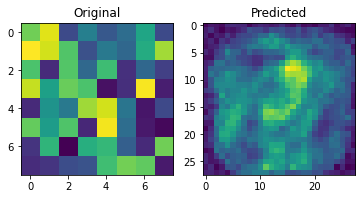

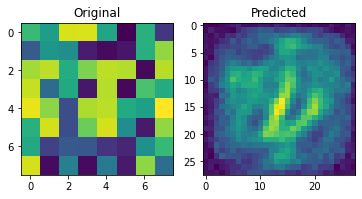

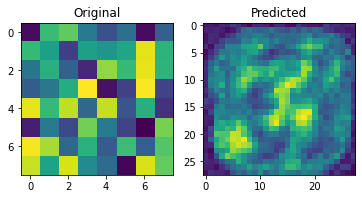

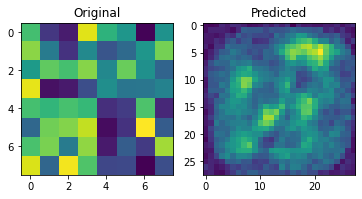

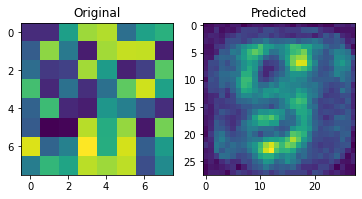

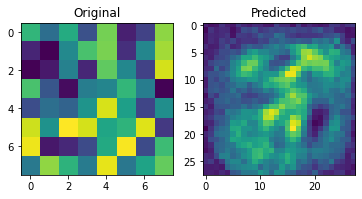

In [12]:
# if we make a model that takes in (1, 64) as input image 
# as encoded image and see what is the trained model's 
# decoder output. 
bottleneck_to_output = tf.keras.Model(loaded_autoencoder_model.get_layer("bottleneck_layer").output, loaded_autoencoder_model.get_layer("output_layer").output)
bottleneck_to_output.summary()

# We have to give an input of (1, 64) for 1 image prediction. 
# Lets use a psueudo number generator to create an array 
# of (1, 64) and pass it to bottleneck_layer as encoded 
# input image. 
encoded_images_to_predict = 50
encoded_image_size = LATENT_SPACE_DIM
random_X_test = np.random.rand( encoded_images_to_predict, encoded_image_size ) 

predicted_output_images = bottleneck_to_output.predict( random_X_test )

# Fix the normalization (from 0 - 1 to 0 - 255).
# Fix the shape from (N, M) -> (N, H, W, C)
predicted_output_images = np.reshape( predicted_output_images * 255, (-1, imgH, imgW ) )
predicted_output_images = predicted_output_images.astype(np.uint8)


# Fix the normalization (from 0 - 1 to 0 - 255).
# Fix the size i.e. bottleneck layer has 64 dimension 
# we resize it encoded images to 8x8 
random_X_test = np.reshape( random_X_test * 255, (-1, 8, 8 ) )
random_X_test = random_X_test.astype(np.uint8)


fig = plt.figure()
fig.suptitle("Results" , fontsize=16)

for i in range(encoded_images_to_predict):
  ax = plt.subplot("121")
  ax.set_title("Original")
  plt.imshow( random_X_test[i] )

  ax = plt.subplot("122")
  ax.set_title("Predicted")
  plt.imshow( predicted_output_images[i] )
  plt.show()


## **Summary**

In this workshop, we trained an autoencoder model on MNIST digits dataset, saved the mode and looked at its prediction from three different layers i.e. 

1) Input to Output 

2) Input to Bottleneck 

3) Bottleneck to Output

We noticed that if we give random encded images, they do NOT reconstruct to number which says something about our trained model i.e. it actually trained and encoded the dataset into some latent space. We can use this reduced latent space representation to do other cool things such as use it in a CNN model to train another model which we will try next time (probablly). 